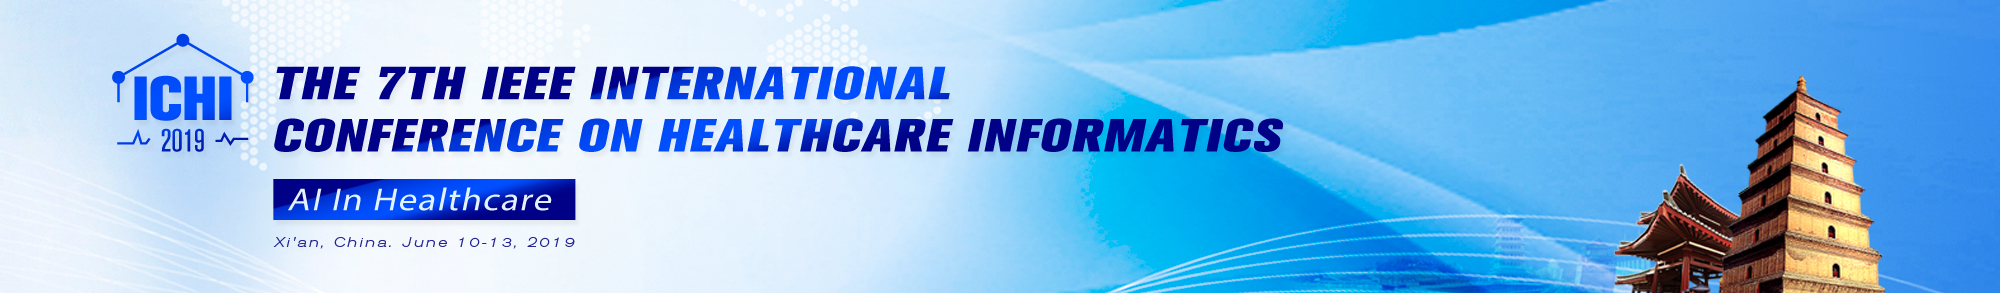

<h3>ICHI 2019 Tutorial - Translational Health Informatics Hands-on tutorial session</h3>

# From Risk Prediction Modeling to Risk Assessment Service

## Link: https://github.com/IEEE-ICHI/tutorial

<h2 style="background-color:#5596e6; color:#fff;">⭐️ Part 2 - Introduction to a <i>Deep Learning</i> Approach </h2>

## Step 0. Preparations

### Install required python packages

Running the following command will install/update listed Python packages using pip: `pandas scikit-learn matplotlib tensorflow keras h5py`

These packages are required to perform later analysis jobs.

In [1]:
! pip install -Uq pandas scikit-learn matplotlib tensorflow keras h5py

## Step 1. Loading data

In this step, we will:
 - using package `pandas` to load the data from a CSV file (located at `../data/synthetic_data_series.csv`) into our program, and
 - take a preview and do some basic statistics on the dataset
 
<span style="background-color:#111; color:#fff">
    <b>Notice:</b> The dataset used in this tutorial is <i>synthetic</i>. 
</span>

The dataset synthetic process:
 - is designed to be comply with HIPPA regulations and avoid any patient data privacy issue
 - is based on an real-world clinical problem, and designed to help researchers understand the clinical problem and modleing pipeline
 - tried to make the distribution of each feature same with real-world data, but **the analyis/modeling result is not meaningful for real-world use**.

### a) Read the sequence data using pandas

In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv(
    '../data/synthetic_data_series.csv',
    index_col=(0,1),
    usecols=[
        'record_id', 'patient_id',
        'age', 'sbp', 'dbp', 'CurrentSmoking', 'CurrentDrinking', 'historyOfHypertension',
        'height', 'weight', 'hba1c', 'total_cholesterol', 'ldl_c', 'hdl_c', 'ascvd'
    ]
)

### b) Peek the loaded data

Execute the code in cell below to take a look at the first 10 rows of the loaded data.

This dataset include the synthetic patients records of in sequences:
 - Each row is a record of of patients
 - Given a patients, he/she may have multiple records in the dataset
 - Column `patient_id` is a identifier for patient

In [3]:
df.head(n=10)

,,age,sbp,dbp,CurrentSmoking,CurrentDrinking,historyOfHypertension,height,weight,hba1c,total_cholesterol,ldl_c,hdl_c,ascvd
record_id,patient_id,,,,,,,,,,,,,
0,P_001,67.798380,137.846712,82.172802,1.0,1.0,1.0,176.123209,64.168104,10.752250,4.954267,3.207282,2.454508,0.0
1,P_001,69.055123,136.092495,63.129122,1.0,1.0,1.0,176.123209,64.168104,6.717141,6.543688,4.282093,2.299544,1.0
2,P_002,54.845823,127.846026,80.722764,0.0,1.0,1.0,161.508699,71.228024,17.284954,2.102130,1.321620,1.283189,0.0
3,P_002,55.703526,120.929172,70.484064,0.0,1.0,1.0,161.508699,71.228024,14.454307,1.170665,0.758518,1.370748,0.0
4,P_002,57.006217,131.141639,67.910170,0.0,1.0,1.0,161.508699,71.228024,15.171708,1.304639,0.847746,1.746102,0.0
5,P_003,62.336208,119.848049,66.284250,1.0,1.0,1.0,163.997850,70.496251,20.783836,1.389095,0.920079,1.792870,0.0
6,P_003,62.388957,137.377183,68.617232,1.0,1.0,1.0,163.997850,70.496251,12.848024,0.582666,0.343652,1.605832,0.0
7,P_004,72.630331,132.367250,67.337019,1.0,0.0,1.0,159.228934,71.742820,15.844065,1.473982,1.028665,1.940458,0.0
8,P_004,73.060982,122.685742,73.081761,1.0,0.0,1.0,159.228934,71.742820,11.286795,0.710345,0.530057,1.928121,0.0


This is the same dataset we used in Part 1, a sequence dataset.


This time, we will ignore the `visit_date` column, since the `age` column already indicates the patient's when the encounter happens.

### c) Get some descriptive information from the loaded dataset

In [4]:
df.describe()

,age,sbp,dbp,CurrentSmoking,CurrentDrinking,historyOfHypertension,height,weight,hba1c,total_cholesterol,ldl_c,hdl_c,ascvd
count,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000
mean,51.404142,127.493068,76.236457,0.389917,0.463944,0.917677,167.751663,67.178156,12.669892,4.849800,3.174031,1.631010,0.519464
std,10.161313,7.677667,7.397623,0.487809,0.498778,0.274900,9.438074,9.258439,5.820828,2.229205,1.446663,0.410678,0.499701
min,19.906547,105.356765,59.182733,0.000000,0.000000,0.000000,148.161053,48.301092,1.500360,0.043441,0.127793,0.233504,0.000000
25%,44.800008,121.504636,70.088058,0.000000,0.000000,1.000000,160.281541,60.419554,7.663787,3.120871,2.047749,1.346807,0.000000
50%,51.330017,127.413933,75.950594,0.000000,0.000000,1.000000,167.730897,67.312524,12.720243,4.838173,3.164522,1.618296,1.000000
75%,58.051899,133.876171,82.200879,1.000000,1.000000,1.000000,175.114444,73.503048,17.637581,6.589848,4.296025,1.903238,1.000000
max,80.025541,142.254757,92.379252,1.000000,1.000000,1.000000,186.416822,86.122670,23.429318,9.989576,6.471933,2.930680,1.000000


### d) Divide into X/y first to convenient later use 

In [5]:
df_X = df.drop(['ascvd'],axis=1)
df_y = df['ascvd']

In this example, our risk prediction target is column `ascvd`, whose value is binary. In other words, there are two classes in this classification problem.

In [6]:
n_classess = len(set(df_y.values))
print('Number of classess in this classification problem:', n_classess)

Number of classess in this classification problem: 2


### e) Also get maximum number of patients' visit (encounter)

In [7]:
from collections import Counter

pids = sorted(df.index.get_level_values(1))
cnts = Counter(pids)

seq_max_len = max(cnts.values())
seq_numbers = len(cnts)
seq_X_cols = len(df_X.columns)

print('The dataset include records of %d unique patients, and maximum number of encounter is %s.' % (seq_numbers, seq_max_len))
print('For the dataset, %s columns will be used to predict the target.' % seq_X_cols)

The dataset include records of 700 unique patients, and maximum number of encounter is 7.
For the dataset, 12 columns will be used to predict the target.


## Step 2. Pre-process the dataset for Deep Learning algorithm

In order to use Recurrent Neural Network (LSTM, Long Short Term Memory, specifically) to build the risk prediction model, let's shape the data into 3-d tensors.

The 3-d tensors will be in shape of (`number_of_patients`, `number_of_features_in_each_visit`, `max_number_of_sequence`), specifically:
 - `number_of_patients`, the first dimension, represents how many patients are there to build the model
 - `number_of_features_in_each_visit`, the second dimension, represents in each encounter, how many features are collected for each patient
 - `max_number_of_sequence`, the third dimension, represents the maximum number of sequence among all patients

### a) Turn data into cube, or 3-d tensor

Firstly, let's create two zero 3-d tensors for X and y respectively.

In [8]:
data_X = np.zeros(shape=(seq_numbers, seq_X_cols, seq_max_len))
data_y = np.zeros(shape=(seq_numbers, 1), dtype=np.float32)

Then, we will extract correspondent values in the original 2-d matrix, and fit them in to the 3-d tensor.

In this example, lets's say the `max_number_of_sequence` is `m`. If patient `P` has less then `m` encounter, all other values in  his/her sequence will be set to zero.

This technique, leaving the unseen sequence values as zeros, is callled `zero-padding`.

There are different methods of padding (which may influence the model's performance), we use the zero-padding technique in this exmaple for demonstration.

In [9]:
pids = np.array(pids)

for i, pid in enumerate(sorted(set(pids))):
    idx = pid == pids
    t_X = df_X.loc[idx, :].values
    t_y = max(df_y[idx].values)
    
    data_X[i, :, :len(t_X)] = t_X.T
    data_y[i, :] = t_y   

Therefore, the `data_X` and `data_y` will have be of shape:

In [10]:
data_X.shape, data_y.shape

((700, 12, 7), (700, 1))

### b) Split data into training set and testing set

In [11]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.20)

After training/testing set split, the training and testing set data tensors have the following shapes:

In [12]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((560, 12, 7), (140, 12, 7), (560, 1), (140, 1))

## Step 3. Build Risk Prediciton using Recurrent Nerual Netowrk

### a) Load package to build LSTM neural network model

In [13]:
import keras.layers as L

from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.


### b) Build the LSTM model by adding layers

In [14]:
inputs = L.Input(shape=(seq_X_cols, seq_max_len))

x = L.Masking()(inputs)
x = L.LSTM(units=8)(x)
x = L.Dropout(rate=0.5)(x)

y = L.Permute(dims=(2, 1))(inputs)
y = L.Conv1D(filters=128, kernel_size=8, padding='same', kernel_initializer='he_uniform')(y)
y = L.BatchNormalization()(y)
y = L.Activation(activation='relu')(y)
#y = squeeze_excite_block(y)


y = L.Conv1D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_uniform')(y)
y = L.BatchNormalization()(y)
y = L.Activation('relu')(y)
y = L.GlobalAveragePooling1D()(y)

x = L.concatenate([x, y])

outputs = L.Dense(n_classess, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=10e-4),
    metrics=['categorical_accuracy',]
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### c) Take a look at the LSTM neural netwok model stucture (summary)

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 12, 7)        0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 7, 12)        0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 7, 128)       12416       permute_1[0][0]                  
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 128)       512         conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation

## Step 4. Train the LSTM neural network model

### a) Train the model by feeding training data

In [16]:
history = model.fit(
    x=train_X,
    y=to_categorical(train_y),
    epochs=50,
    batch_size=64,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 1s - loss: 0.8443 - categorical_accuracy: 0.4893
Epoch 2/50
 - 0s - loss: 0.6037 - categorical_accuracy: 0.6625
Epoch 3/50
 - 0s - loss: 0.5779 - categorical_accuracy: 0.6857
Epoch 4/50
 - 0s - loss: 0.5527 - categorical_accuracy: 0.6964
Epoch 5/50
 - 0s - loss: 0.5424 - categorical_accuracy: 0.6946
Epoch 6/50
 - 0s - loss: 0.5263 - categorical_accuracy: 0.7107
Epoch 7/50
 - 0s - loss: 0.5237 - categorical_accuracy: 0.7375
Epoch 8/50
 - 0s - loss: 0.5045 - categorical_accuracy: 0.7482
Epoch 9/50
 - 0s - loss: 0.4973 - categorical_accuracy: 0.7393
Epoch 10/50
 - 0s - loss: 0.4661 - categorical_accuracy: 0.7643
Epoch 11/50
 - 0s - loss: 0.4511 - categorical_accuracy: 0.7857
Epoch 12/50
 - 0s - loss: 0.4249 - categorical_accuracy: 0.7911
Epoch 13/50
 - 0s - loss: 0.4029 - categorical_accuracy: 0.8036
Epoch 14/50
 - 0s - loss: 0.3989 - categorical_accuracy: 0.8107
Epoch 15/50
 - 0s - loss: 0.3812 - categorical_accuracy: 0.8054
E

### b）Visualize the LSTM model training process - model loss and model accuracy on training set

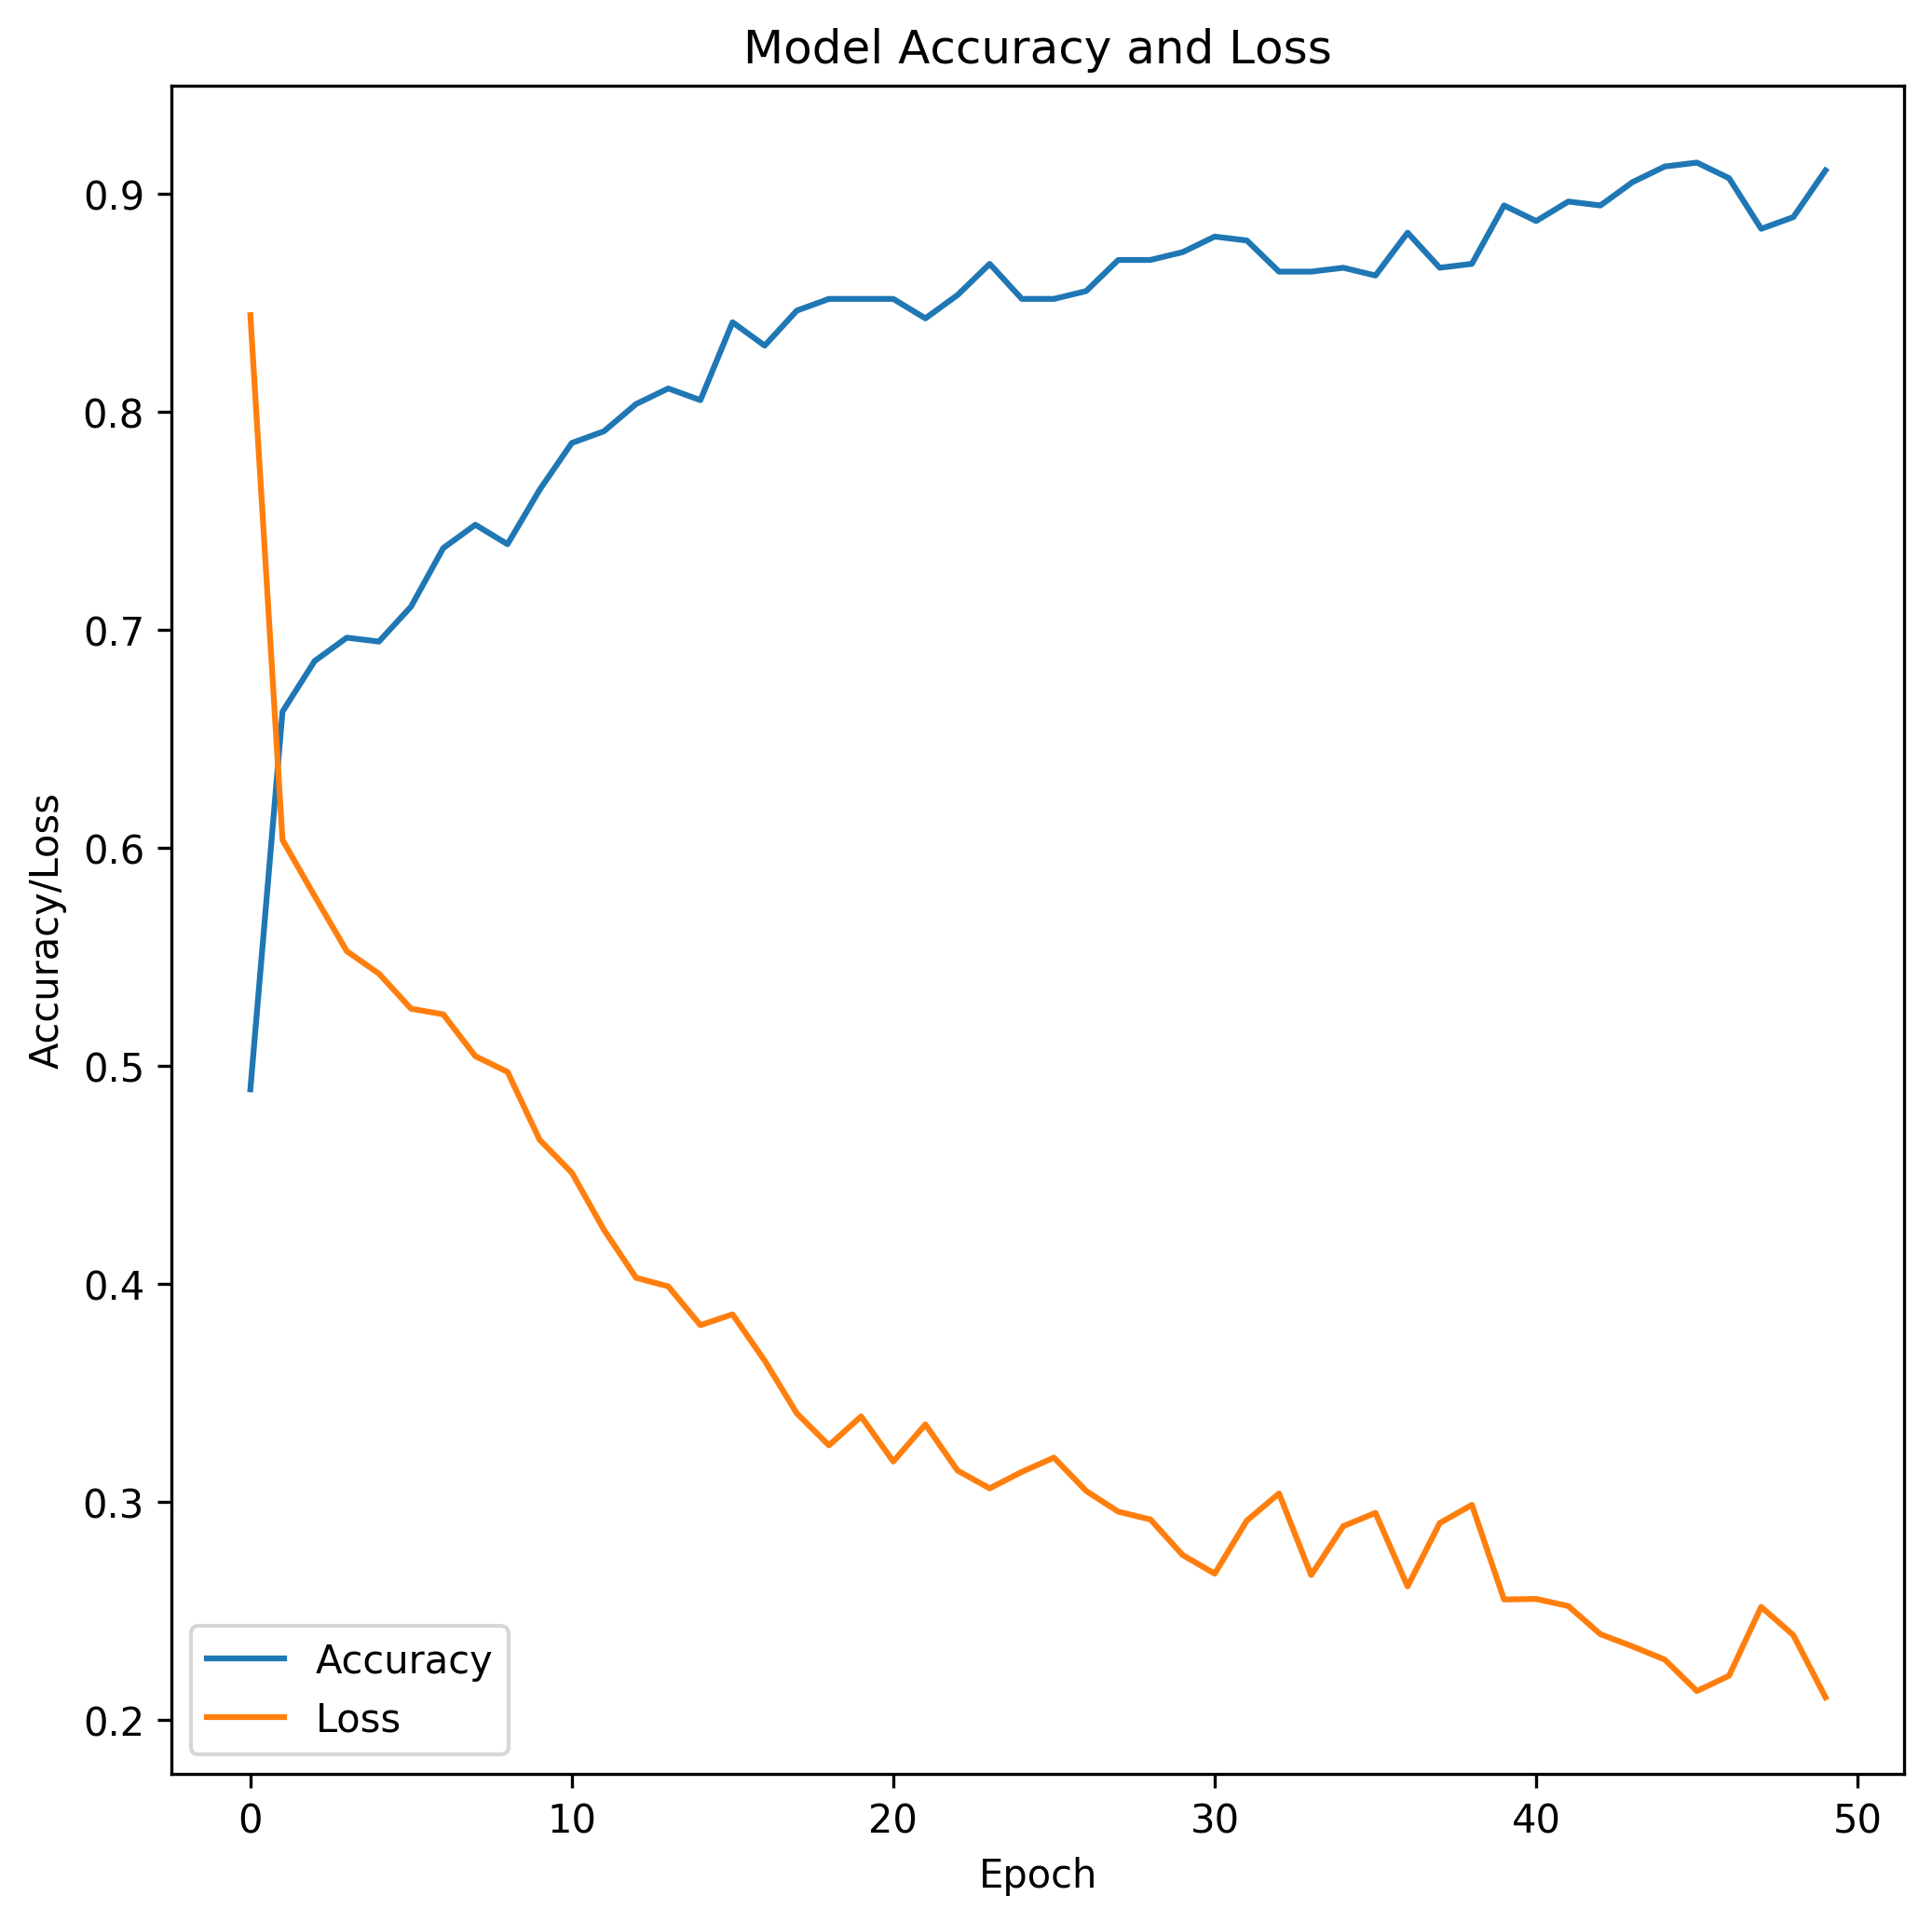

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8), dpi=300)

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')

plt.legend(['Accuracy', 'Loss'], loc='lower left')

plt.show()

## Step 5. Model Evaluation - on Testing set

### a) Peek the predcition result of the built model on testing data

In [18]:
y_P_pred = model.predict(test_X)
y_pred = np.array([1 if x[0]<x[1] else 0 for x in y_P_pred])

In [19]:
pd.DataFrame.from_dict(dict(
    y_actural=test_y.reshape(len(test_y)),
    y_pred=y_pred,
    y_pred_prab=y_P_pred[:, 1]
)).head(10)

,y_actural,y_pred,y_pred_prab
0,0.0,0,0.105393
1,1.0,1,0.994952
2,1.0,1,0.940227
3,1.0,1,0.529209
4,0.0,0,0.180334
5,0.0,1,0.827535
6,1.0,1,0.612345
7,0.0,1,0.597655
8,1.0,1,0.998474
9,0.0,0,0.060586


### b) Measure the performance of built LSTM model on testing set¶

In [20]:
from sklearn import metrics

accuracy = np.mean( y_pred == test_y.reshape(len(test_y)) )
logit_roc_auc = metrics.roc_auc_score(test_y, y_P_pred[:, 1])
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_P_pred[:, 1])

print('Accuracy=%.4f \t AUC=%.4f' % (accuracy, logit_roc_auc))

Accuracy=0.7357 	 AUC=0.8500


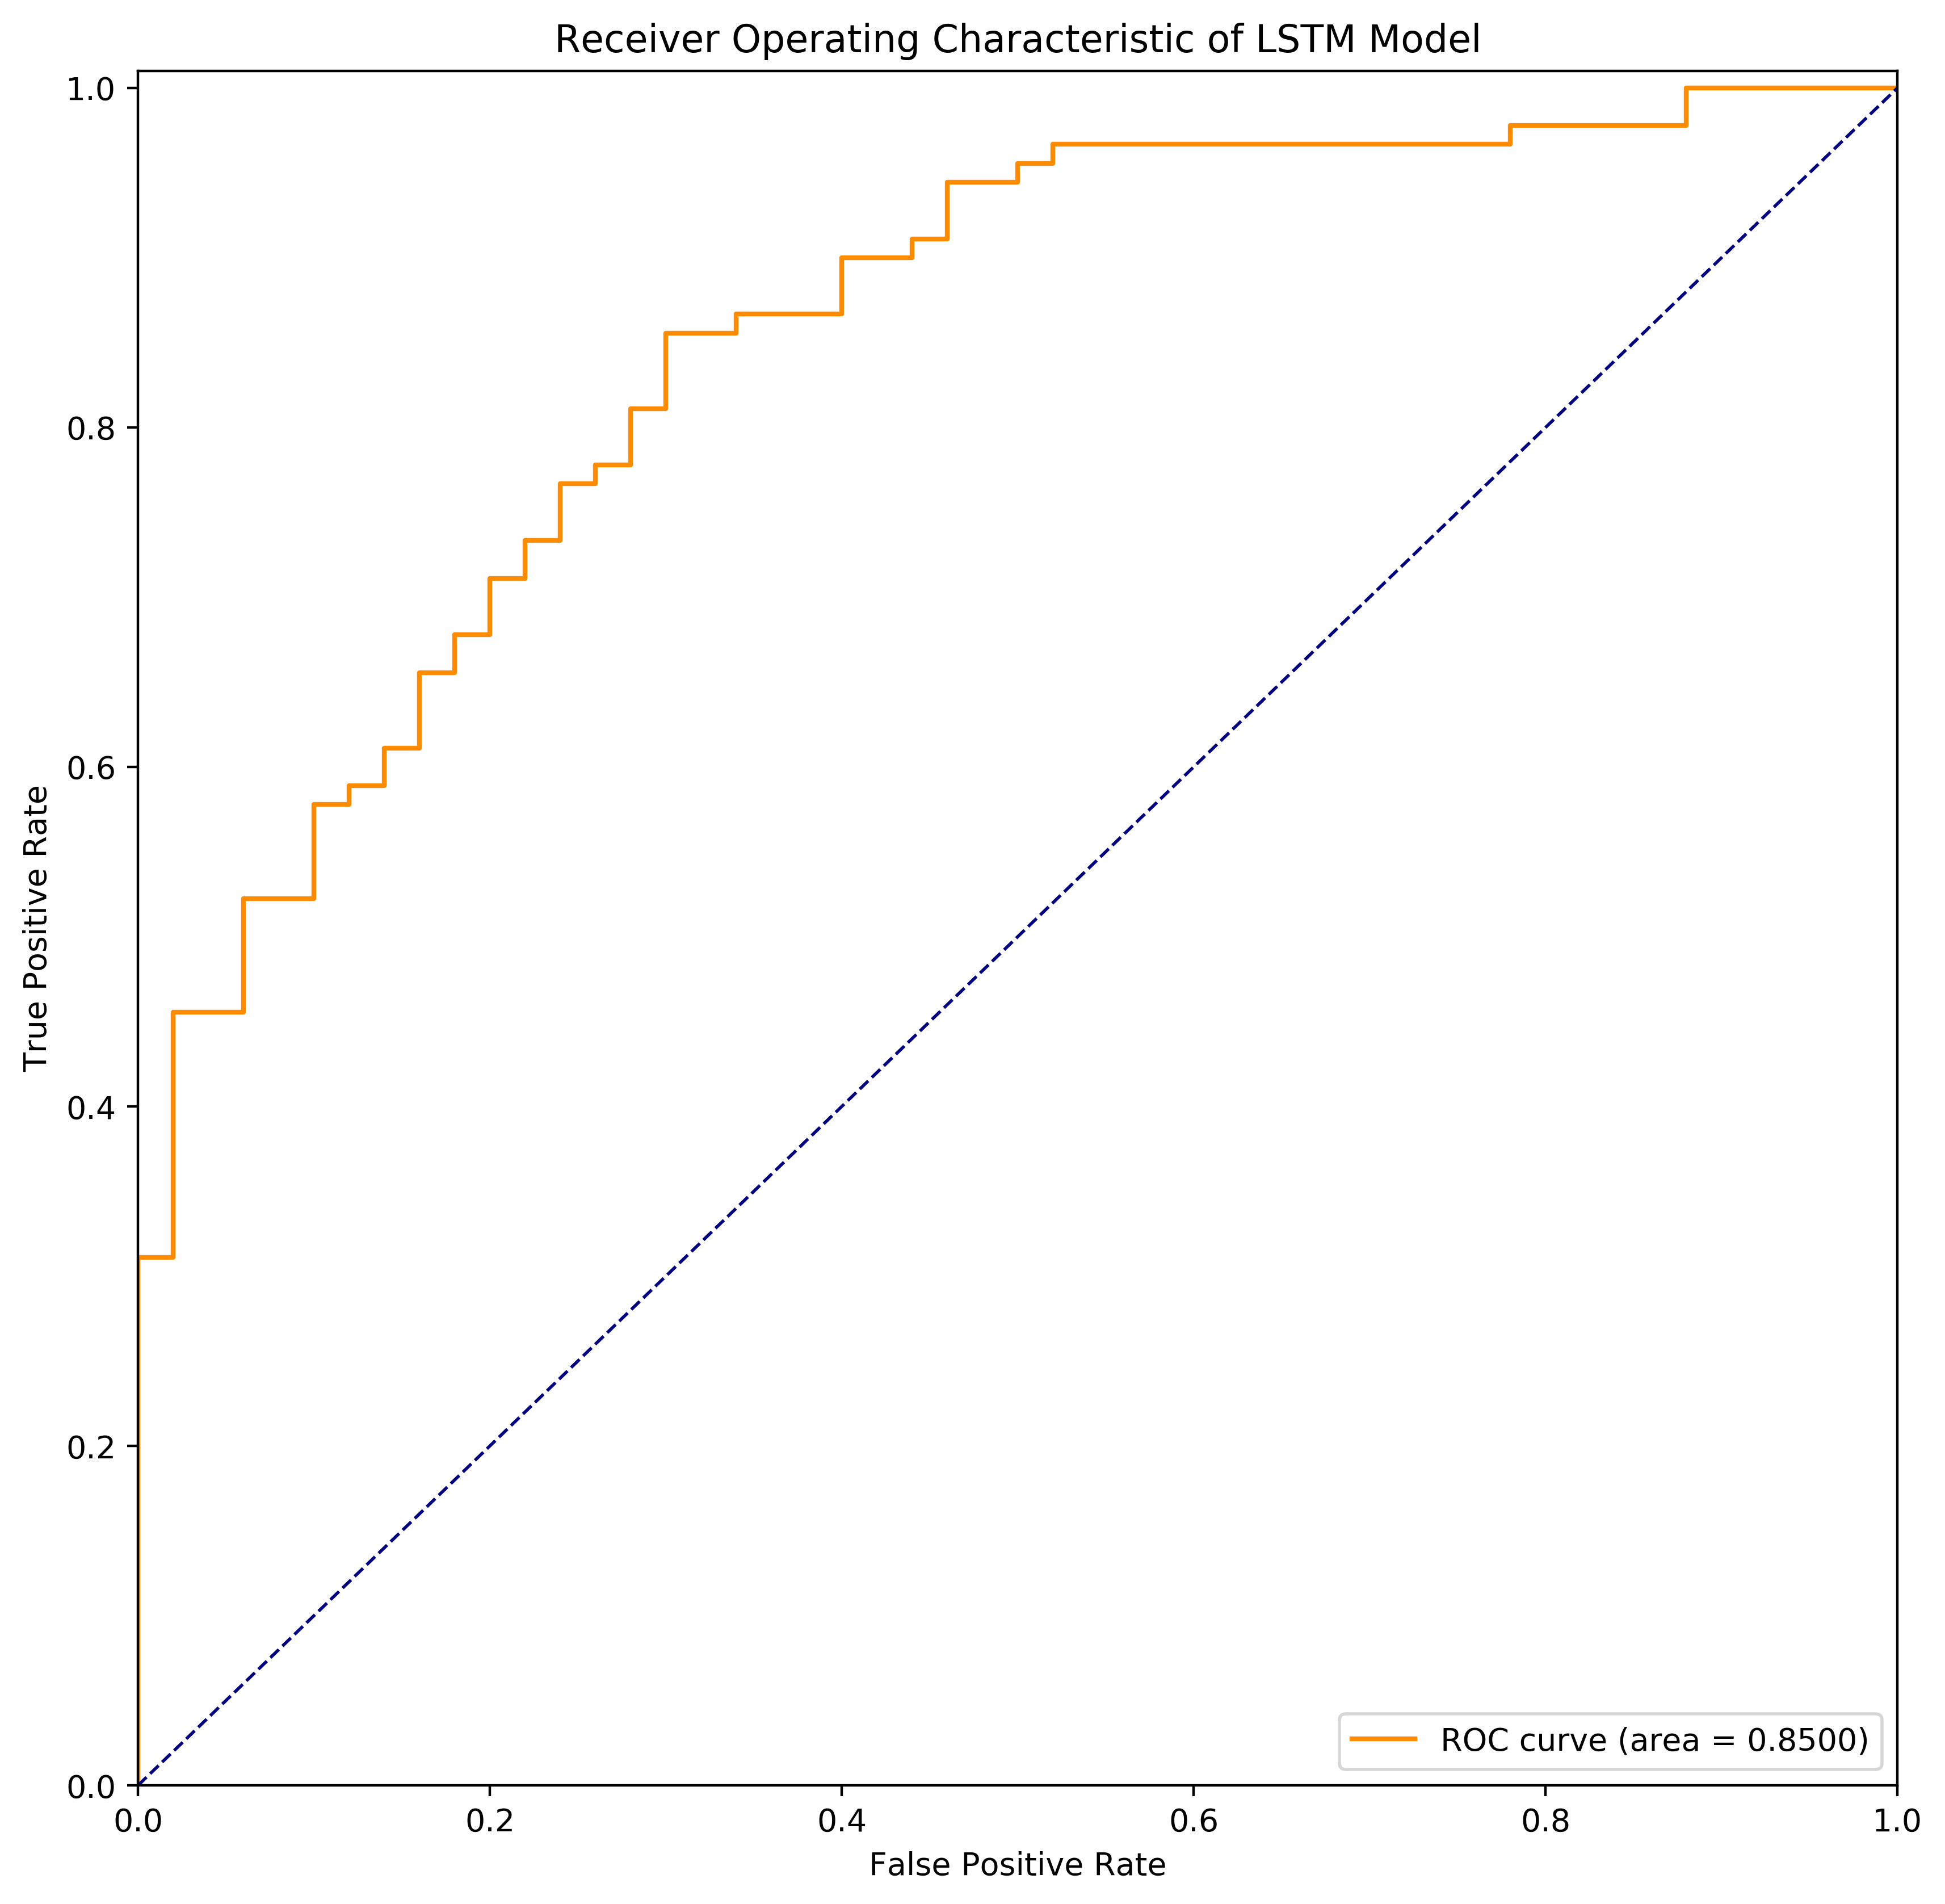

In [21]:
%matplotlib inline

from figure import plot_roc_curve
plot_roc_curve(fpr, tpr, logit_roc_auc, title='LSTM Model')

### Notice - About model performance

Since we are using synthetic data, the performance of the trained LSTM model is not meaningful.

In real-world cases, models built with Recurrent Neural Network models like LSTM perform better than statistical machine learning models, especially when RNN models' parameters are fine tuned.

## Step 6. Save the model for later use, and load model to do a prediction task

### a) Save the model to a file

Similar to the exmaple in Part 1, for later use, let's save the trained LSTM model to a file, so that you can use it later without training it again. You can also copy this model to other computers to use it in an applicaiton.


Here, we will save the model as a file: `./lstm.model`.

In [22]:
model.save('./lstm.model')

### b) Use the model without re-training and original data

Now let's assume you copy the model to another computer and you want to use it. It's pretty simple to use the model!

In this new envioronment, simply install required pthon packages with `pip install -Uq keras tensorflow h5py`, and you will be able to use it. It's also just two lines of code:

In [23]:
from keras.models import load_model

model_loaded = load_model('./lstm.model')

### c) Use the model to do some prediction

Now you have loaded the model to variable `model_loaded`.

What is a little bit different this time is that, you need to create a patient's sequence records as the model's input, and let the model to predict this patient's risk of ASCVD.

Notice that the order of following features (columns) must also be same as the training data, and **for this model, lenght of the sequence must be same as `seq_max_len`**. If the current patient's record sequence is less than, the rest of the row needed to be `padded`.

Since we used the `zero-padding` technique when extracting data from original records to train the LSTM model, we will also pad zeros here for the unseen sequence values.

In [24]:
test_record = pd.DataFrame.from_records(
    data = [
        [ 51.01 , 133.71 , 71.35 ,  0.00 ,  0.00 ,  1.00 , 165.92 , 74.92 ,  4.19 ,  3.24 ,  2.15 ,  1.43 ],
        [ 51.09 , 140.69 , 65.27 ,  0.00 ,  0.00 ,  1.00 , 165.92 , 74.92 , 17.39 ,  4.58 ,  2.98 ,  1.62 ],
        [ 51.48 , 123.50 , 83.16 ,  0.00 ,  0.00 ,  1.00 , 165.92 , 74.92 , 12.38 ,  8.85 ,  5.76 ,  2.10 ],
        [ 52.96 , 137.36 , 68.40 ,  0.00 ,  0.00 ,  1.00 , 165.92 , 74.92 , 14.58 ,  4.48 ,  2.97 ,  1.52 ],
        [ 54.56 , 137.79 , 64.79 ,  0.00 ,  0.00 ,  1.00 , 165.92 , 74.92 , 13.17 ,  3.82 ,  2.53 ,  1.72 ],
        [ 54.79 , 129.15 , 67.55 ,  0.00 ,  0.00 ,  1.00 , 165.92 , 74.92 ,  7.33 ,  3.25 ,  2.14 ,  1.97 ],
        [  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ,  0.00 ]
    ],
    columns=['age', 'sbp', 'dbp', 'CurrentSmoking', 'CurrentDrinking',
       'historyOfHypertension', 'height', 'weight', 'hba1c', 'total_cholesterol', 'ldl_c', 'hdl_c']
)

After you have created the record sequence, use the code below to do the risk prediciton task.

The `test_values` variable simply extract the values from `test_record` to fit the model's requirement.

After the prediciton, the prediction result is printed at last.

In [25]:
test_values = np.stack([test_record.T])

predicted_prob = model_loaded.predict(test_values)[0]
predicted_class = np.argmax(predicted_prob)


print(
    'The risk prediciton result for the given record is %d, with a risk score (probability) of %.2f.' % (
        predicted_class,
        predicted_prob[1]
    )
)

The risk prediciton result for the given record is 1, with a risk score (probability) of 0.61.


## Acknowledgement

This notebook is prepared by [IBM Research China](http://research.ibm.com/labs/china/) AI for Healthcare team.